In [ ]:
Project: IMDb Word Frequency Analyzer by Sentiment
Goal: Find the most common words in movie reviews and compare between positive and negative sentiments.

In [2]:
#import Library
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df["sentiment"].value_counts()  #count how many positive and negative 

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
#Clearn text 
import re
def clean_text(text):
    text = str(text).lower() #Converts everything to lowercase
    text = re.sub(r'\d+', '', text) #Removes all digits (0–9) using regex (\d+ means one or more digit
    for p in string.punctuation:  #!"#$%&'()*+,-./:;<=>?@[\]^_`{|}  pre define
        text = text.replace(p, '')   # Remove punctuation
    text = text.replace('\n', ' ')   # Remove newlines
    return text   # clean karke dega 



In [8]:
#Combine and Tokenize Reviews
from nltk.corpus import stopwords
def get_words(text_series, remove_stopwords=True):
    all_text = text_series.dropna().apply(clean_text).str.cat(sep=' ')  # text_series.dropna() Removes any missing  apply(clean_text) text lowercase, removes digits, punctuation, and newlines)  .str.cat(sep=' ') all the cleaned text entries into a single string with spaces separating the
    words = all_text.split()  #plit the combined text into individual words
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))  # List of common words (like 'is', 'the', etc.)
    words = [w for w in words if w not in stop_words]  # Filter out stopwords
    return words


In [9]:
from collections import Counter
import string
words = get_words(df['review'])      # All reviews
word_counts = Counter(words)         # Frequency dictionary
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")  # Top 10 words

br: 114887
movie: 83521
film: 74458
one: 51028
like: 38991
good: 28570
even: 24575
would: 24024
time: 23267
really: 22951


In [30]:
import matplotlib.pyplot as plt
#Plot Bar Chart
def plot_top_words(word_counts, top_n=20, title="Top Words"):
    common = word_counts.most_common(top_n)
    words, counts = zip(*common)

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel("Count")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()


In [32]:
from wordcloud import WordCloud
# Shows a visual cloud of words where size = frequency
def show_wordcloud(word_counts, title="Word Cloud"):
    wc = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(15, 7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()


In [34]:
#Analyze By Sentiment
def analyze_by_sentiment(df):
    for sentiment in df['sentiment'].unique():
        print(f"\nSentiment: {sentiment}")
        text_series = df[df['sentiment'] == sentiment]['review']
        words = get_words(text_series)
        word_counts = Counter(words)

        plot_top_words(word_counts, title=f"Top Words ({sentiment})")
        show_wordcloud(word_counts, title=f"Word Cloud ({sentiment})")


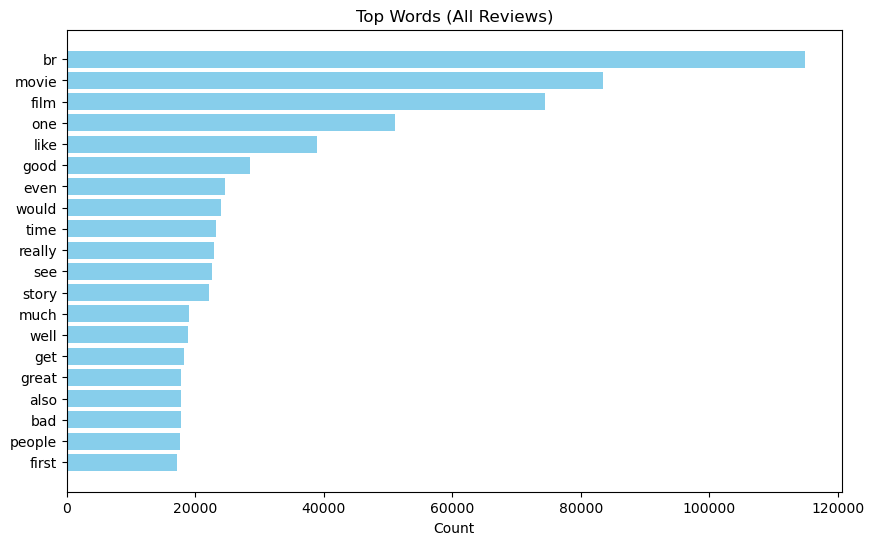

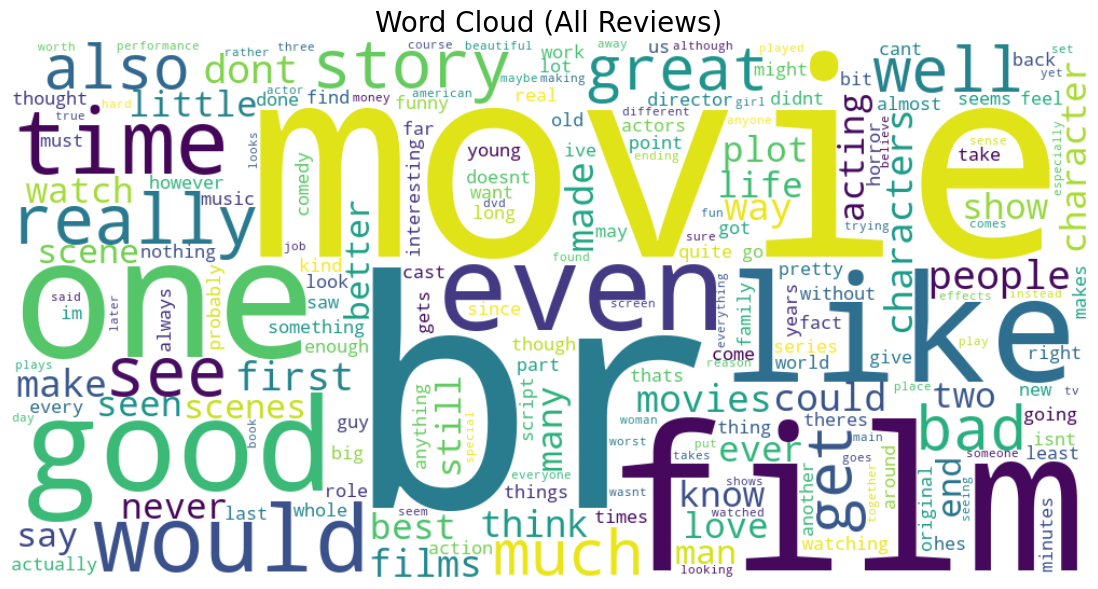


Sentiment: positive


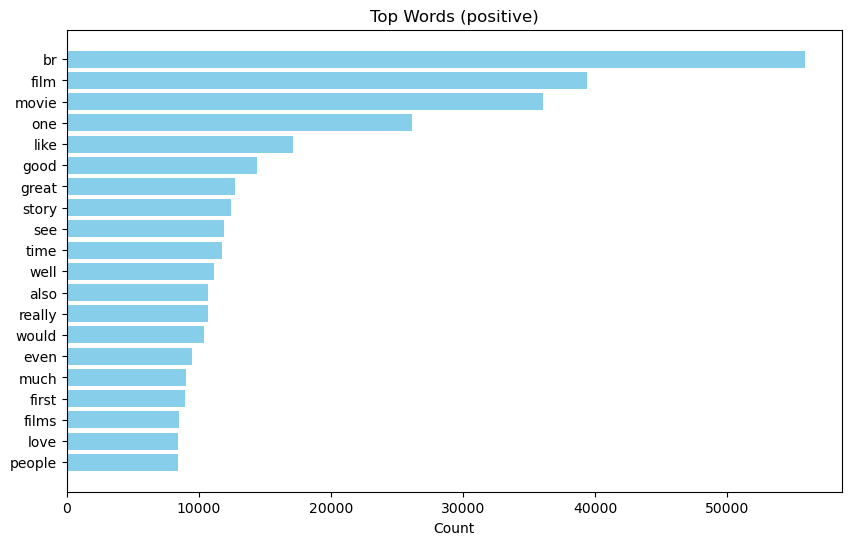

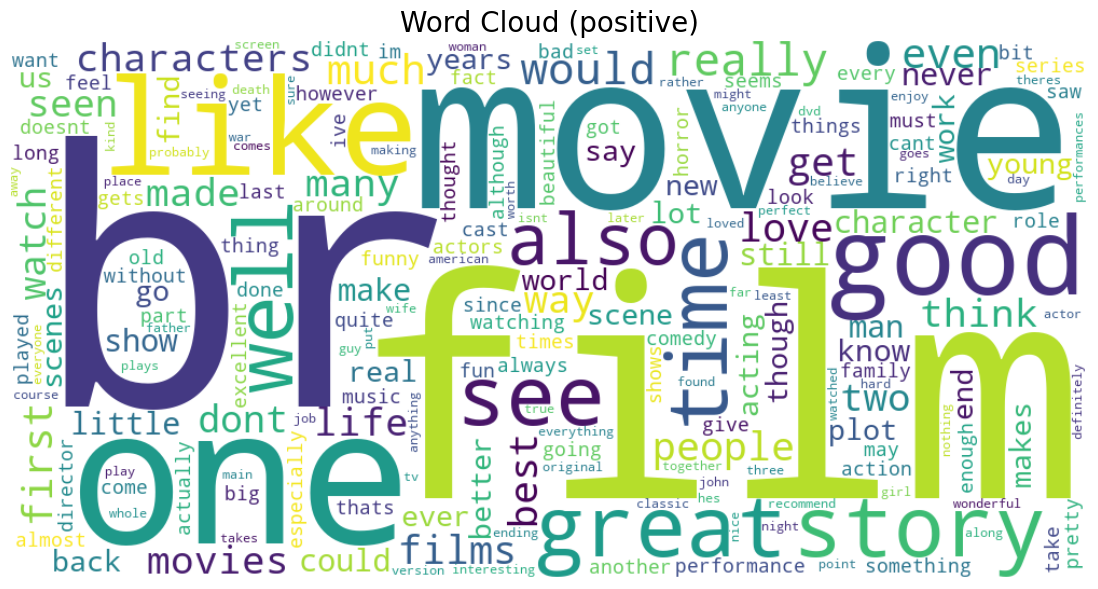


Sentiment: negative


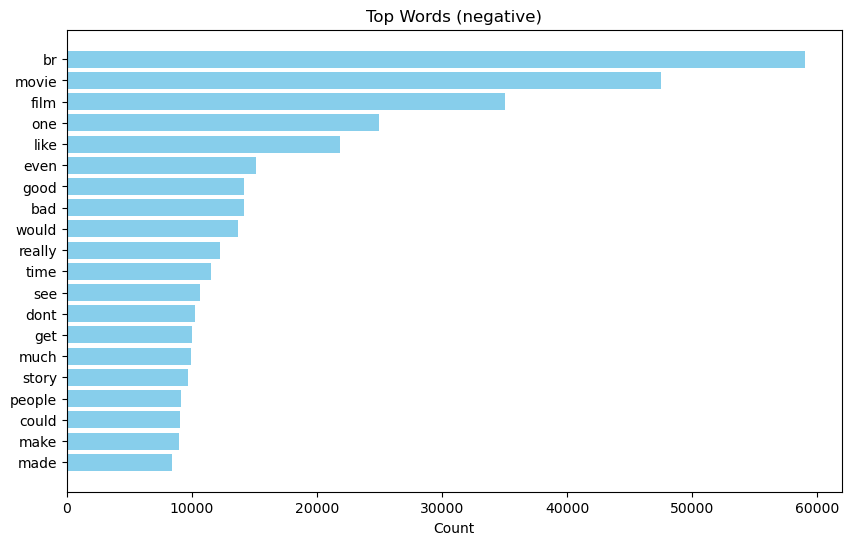

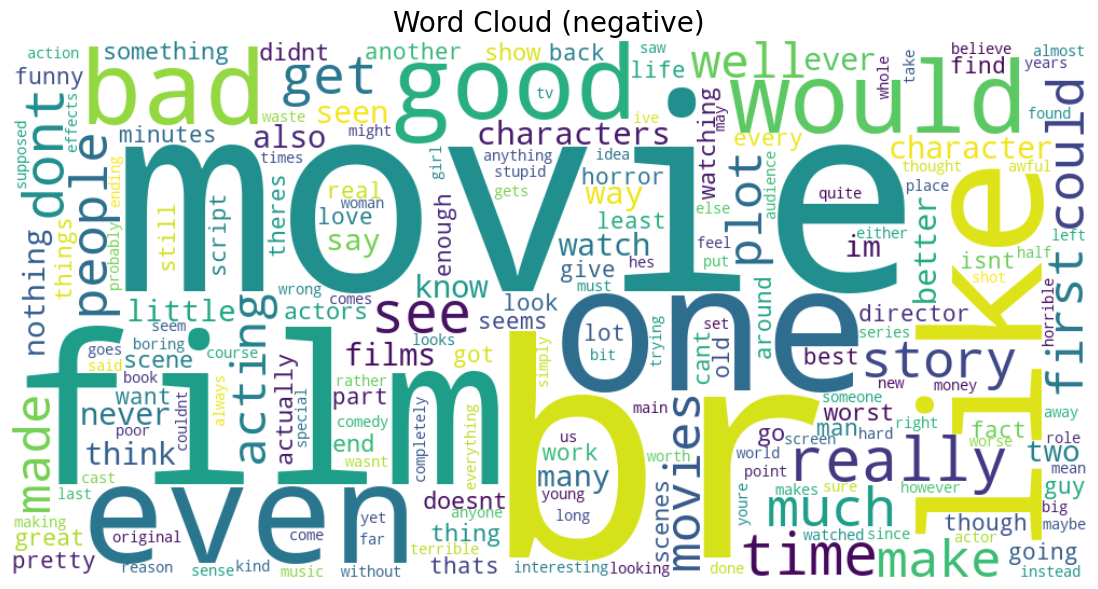

In [36]:
# Analyze all reviews
all_words = get_words(df['review'])
all_counts = Counter(all_words)
plot_top_words(all_counts, title="Top Words (All Reviews)")
show_wordcloud(all_counts, title="Word Cloud (All Reviews)")

# Now analyze by sentiment
analyze_by_sentiment(df)


In [ ]:
Observations from the Project
1. Balanced Dataset
The dataset contains an equal number of positive and negative reviews (typically 25,000 each).

This balance ensures fair analysis without model/sentiment bias.

2. Text Cleaning Was Effective
Removing digits, punctuation, and converting to lowercase helped in standardizing the text.

This reduces noise and improves word frequency accuracy.

3. Stopword Removal Enhanced Focus
Eliminating common English stopwords (the, and, is, etc.) allowed more meaningful words to stand out.

Resulted in keywords that reflect actual sentiment.

4. Sentiment-Specific Word Usage
Positive reviews included words such as:"great", "amazing", "love", "excellent", "wonderful"

Negative reviews featured:"boring", "bad", "waste", "worst", "awful"

This clearly shows how word choice reflects user emotion and satisfaction level.

5. Most Frequent Words Help Summarize Emotions

Frequent word analysis gives a quick summary of how users felt.

Can be useful for building sentiment-based recommendation systems or summarizers.


